In [1]:
#Corinne Komlodi
#Worked With: andrea, aldair
#Hours Taken: 3.5

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [26]:
print('1.')
print('a.')
rec = 3.8 #cm yr-1
cm = 100000 #km
moond = 384400 #km
moondiam = 2*1738 #km
sundiam = 1.3927e6 #km
sundist = 1.496e13/cm #km
#206265 X (Actual diameter / Distance)
angDiamSun = (sundiam/sundist)
e = 0.055
moondist = (moondiam)/(angDiamSun*(1-e))
time = (((moondist-moond)*cm)/rec)/1e6
print('{0:.4f} Myr until no more total eclipses :('.format(time))

print('b.')
moondistannular = (moondiam)/(angDiamSun*(1+e))
timeannular = np.absolute((((moondistannular-moond)*cm)/rec)/1e6)
print('{0:.4f} Myr since the beginning of annular eclipses'.format(timeannular))

1.
a.
281.9368 Myr until no more total eclipses :(
b.
802.1863 Myr since the beginning of annular eclipses


2.


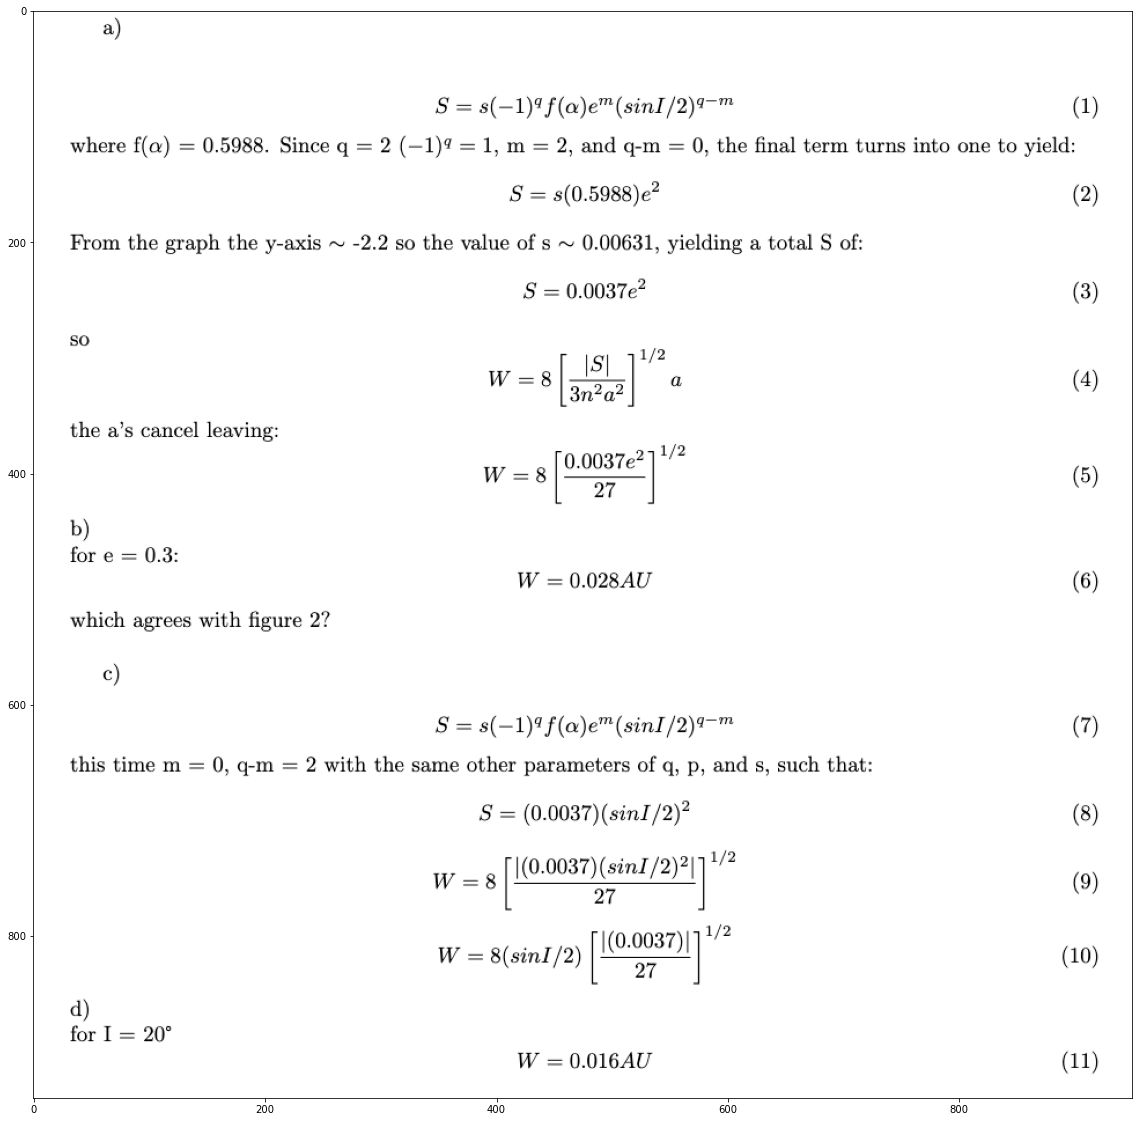

In [89]:
print('2.')
img2 = Image.open("/Users/corinnekomlodi/Desktop/Screenshot 2023-10-28 at 1.39.51 PM.PNG")
fig,ax = plt.subplots(figsize = (20,20))
ax.imshow(img2)

3.
a.
[3.2765637  2.50048609 2.06410579 3.96927425 2.823657   2.95656494
 2.70474374 3.02912318]


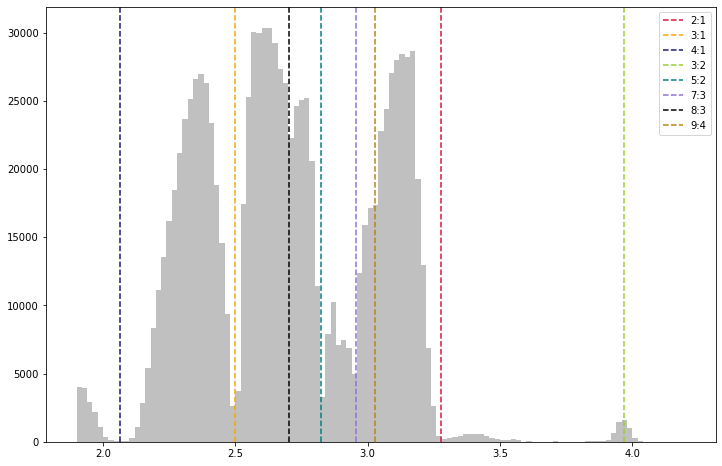

In [88]:
print('3.')
print('a.')
data = pd.read_csv('/Users/corinnekomlodi/Desktop/Asteroids 1.csv')
df = pd.DataFrame(data, columns = ['full_name','a','e','i'])
name, a, e, inc = np.array(df['full_name']), np.array(df['a']), np.array(df['e']), np.array(df['i'])

bins = np.arange(1.9, 4.2, .02)
fig, ax = plt.subplots(1,1,figsize = (12,8))
ax.hist(a, bins = bins, color = 'silver')
resonances = np.array([1/2, 1/3, 1/4, 2/3, 2/5, 3/7, 3/8, 4/9])
color = np.array(['crimson', 'orange', 'midnightblue', 'yellowgreen', 'teal', 'mediumpurple', 'black', 'darkgoldenrod'])
labels = np.array(['2:1', '3:1', '4:1', '3:2', '5:2', '7:3', '8:3', '9:4'])
x = (((resonances)*11.862)**2)**(1/3)
print(x)
for i in range(0,len(x)):
    ax.axvline(x = x[i], ymin = 0, ymax = 30000, color = color[i], linestyle = '--', label = labels[i])
ax.legend()


#which one of these resonances exhibits an enhancement of asteroids instead of a kirkwood gap?
#3:2 as its the only peak


b.


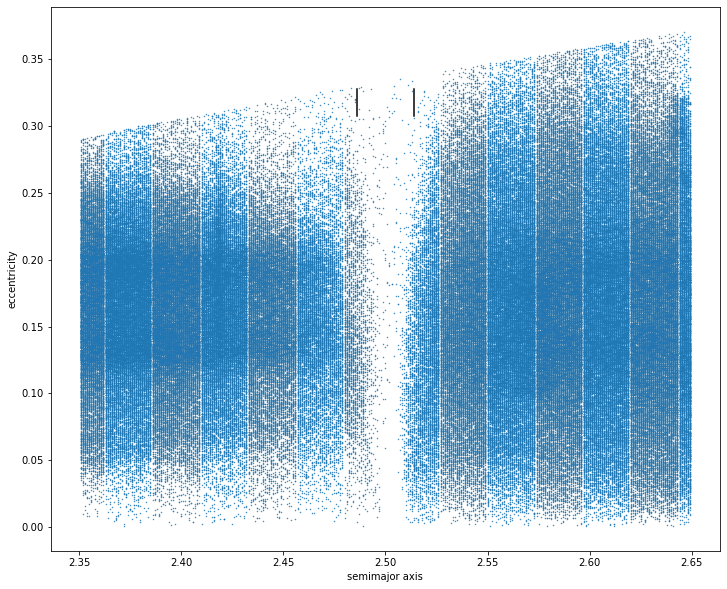

In [115]:
print('b.')

au = np.where((a<2.65)&(a>2.35))
fig, ax = plt.subplots(1,1,figsize = (12, 10))
ax.scatter(a[au], e[au], s = .2)
ax.set_ylabel('eccentricity')
ax.set_xlabel('semimajor axis')
ax.axvline(x = 2.5-0.014, ymin = .8, ymax = 0.85, color = 'k')
ax.axvline(x = 2.5+0.014, ymin = 0.8, ymax = 0.85, color = 'k')

#overlay W from number 2 and explain the trend
#at e of .3, the range of AU that have a resonance with jupiter is wider than those with lower value eccentiricty

In [83]:
print('c.')
au1 = np.where((a>2.46)&(a<2.54))
au2 = np.where(((a>2.35)&(a<2.4))|((a>2.6)&(a<2.65)))
meanecc = np.sum(e[au1])
standdev = meanecc/np.sqrt(len(a[au1]))
print('mean eccentricity = {0:.4f}'.format(meanecc))
print('standard deviation of the mean eccentricity = {0:.4f}'.format(standdev))
meanecc2 = np.sum(e[au2])
standdev2 = meanecc/np.sqrt(len(a[au2]))
print('mean eccentricity = {0:.4f}'.format(meanecc2))
print('standard deviation of the mean eccentricity = {0:.4f}'.format(standdev2))
z = np.absolute(meanecc-meanecc2)/np.sqrt(meanecc**2+meanecc2**2)
print('{0:.4f} apart'.format(z))
#which is within one sigma, so not terrible?

c.
mean eccentricity = 4885.8296
standard deviation of the mean eccentricity = 27.3062
mean eccentricity = 23346.3303
standard deviation of the mean eccentricity = 13.0416
0.7740 apart


d.


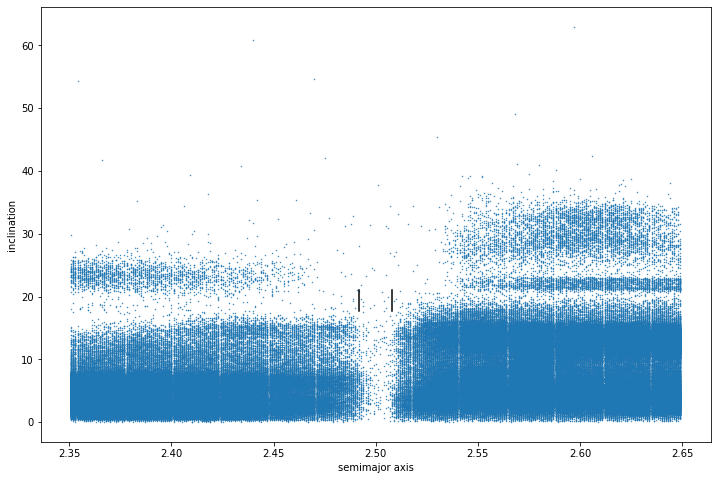

In [109]:
print('d.')
fig, ax = plt.subplots(1,1,figsize = (12, 8))
ax.scatter(a[au], inc[au], s = .2)
ax.set_ylabel('inclination')
ax.set_xlabel('semimajor axis')
ax.axvline(x = 2.5-0.008, ymin = 0.3, ymax = 0.35, color = 'k')
ax.axvline(x = 2.5+0.008, ymin = 0.3, ymax = 0.35, color = 'k')
#overplot width centered on 3:1, explain the trend
#similar above, a gap is formed at inclination of 20°, although there also seems to be a gap at any inclination of 20
#at these locations the gravity of jupiter keeps objects out of this belt by forcing them into a different region.

In [85]:
print('e.')
meaninc = np.sum(inc[au1])
standDinc = meaninc/np.sqrt(len(a[au1]))
print('mean inclination = {0:.4f}'.format(meaninc))
print('standard deviation of the mean inclination = {0:.4f}'.format(standDinc))
meaninc2 = np.sum(inc[au2])
standDinc2 = meaninc/np.sqrt(len(a[au2]))
print('mean inclination = {0:.4f}'.format(meaninc2))
print('standard deviation of the mean inclination = {0:.4f}'.format(standDinc2))
z2 = np.absolute(meaninc-meaninc2)/np.sqrt(meaninc**2+meaninc2**2)
print('{0:.4f} apart'.format(z2))

e.
mean inclination = 225774.1900
standard deviation of the mean inclination = 1261.8204
mean inclination = 1079952.6200
standard deviation of the mean inclination = 602.6541
0.7742 apart
